In [1]:
# Data Engineering
import numpy as np
import pandas as pd

# Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split

# Machine learrning
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.datasets import load_breast_cancer
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# from sklearn.tree import plot_tree
# from sklearn.model_selection import StratifiedKFold
# from sklearn import svm, datasets

In [2]:
# https://www.kaggle.com/c/titanic/data
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
X_train.shape, X_test.shape

((623, 11), (268, 11))

- **Zmienne kategoryczne** -: `Survived`, `Pclass` (ordinal), `Sex`, `Embarked`
- **Zmienne Ciagle** -: `Age`, `Fare`
- **Zmienne dyskretne** -: `SibSp`, `Parch`
- **Typy danych** -: `Ticket`, `PassengerID`, `Cabin`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(percentiles=[0.8, 0.9])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


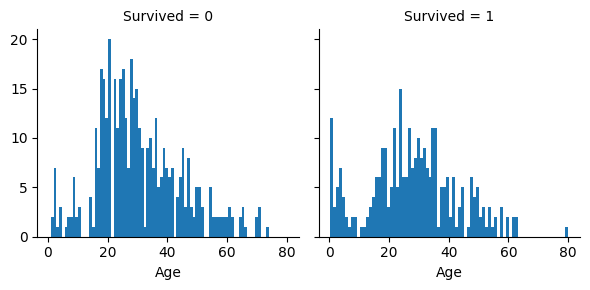

In [12]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=80)

In [13]:
for dataset in [X_train, X_test, df]:
    dataset.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
# df['Name'].values

In [16]:
for dataset in [X_train, X_test, df]:
    dataset['Title'] = dataset['Name'].str.extract(" ([A-Za-z]+)\.", expand=False)

In [17]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [18]:
df['Title'].value_counts().index.values[4:]

array(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms',
       'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], dtype=object)

In [19]:
for dataset in [X_train, X_test, df]:
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace(df['Title'].value_counts().index.values[4:], 'Rare')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [21]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [22]:
df.Title.value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Rare       26
Name: count, dtype: int64

In [23]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.792000
1,Miss,0.699454
0,Master,0.575000
4,Rare,0.423077
2,Mr,0.156673


In [24]:
title_mapping = {'Mr': 1, 'Rare': 2, 'Master': 3, 'Miss': 4, 'Mrs': 5}

for dataset in [X_train, X_test, df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
for dataset in [X_train, X_test, df]:
    dataset = dataset.drop(['Name', 'PassengerId'], axis=1, inplace=True)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,5
2,1,3,female,26.0,0,0,7.9250,S,4
3,1,1,female,35.0,1,0,53.1000,S,5
4,0,3,male,35.0,0,0,8.0500,S,1


In [28]:
df = pd.get_dummies(df, columns=['Sex'])

X_train = pd.get_dummies(X_train, columns=['Sex'])

X_test = pd.get_dummies(X_test, columns=['Sex'])

In [29]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female,Sex_male
709,3,NaN,1,1,15.2458,C,3,False,True
439,2,31.0,0,0,10.5000,S,1,False,True
840,3,20.0,0,0,7.9250,S,1,False,True
720,2,6.0,0,1,33.0000,S,4,True,False
39,3,14.0,1,0,11.2417,C,4,True,False


In [30]:
df = pd.get_dummies(df, columns=['Embarked'])
X_train = pd.get_dummies(X_train, columns=['Embarked'])
X_test = pd.get_dummies(X_test, columns=['Embarked'])

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 709 to 430
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      268 non-null    int64  
 1   Age         215 non-null    float64
 2   SibSp       268 non-null    int64  
 3   Parch       268 non-null    int64  
 4   Fare        268 non-null    float64
 5   Title       268 non-null    int64  
 6   Sex_female  268 non-null    bool   
 7   Sex_male    268 non-null    bool   
 8   Embarked_C  268 non-null    bool   
 9   Embarked_Q  268 non-null    bool   
 10  Embarked_S  268 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 16.0 KB


jak uaupelnic wiek: srednia, usunac rekordy, mediana, srednia od kwantyla 0.2 do 0.8, wylosowac z rozkladu normalnego

In [32]:
df[['Title', 'Pclass', 'Age']].groupby(['Title', 'Pclass']).median()

Age
Title Pclass      
1     1       40.0
      2       31.0
      3       26.0
2     1       45.0
      2       46.5
3     1        4.0
      2        1.0
      3        4.0
4     1       30.0
      2       24.0
      3       18.0
5     1       41.5
      2       32.0
      3       31.0

In [33]:
median = df['Age'].median()

In [34]:
for dataset in [X_train, X_test, df]:
    dataset['Age'].fillna(median, inplace=True)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      623 non-null    int64  
 1   Age         623 non-null    float64
 2   SibSp       623 non-null    int64  
 3   Parch       623 non-null    int64  
 4   Fare        623 non-null    float64
 5   Title       623 non-null    int64  
 6   Sex_female  623 non-null    bool   
 7   Sex_male    623 non-null    bool   
 8   Embarked_C  623 non-null    bool   
 9   Embarked_Q  623 non-null    bool   
 10  Embarked_S  623 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 37.1 KB


### automatyzacjaprocesu uczenia

In [ ]:


def prepare_data(X, y):
    pass